In [1]:
!pip install pyarrow
import pandas as pd
# import pyarrow.parquet as pa

In [2]:
pd.__version__

'1.4.2'

In [3]:
jan_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
jan_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


In [4]:
jan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [5]:
jan_df['start_time'] = pd.to_datetime(jan_df['tpep_pickup_datetime'])
jan_df['end_time'] = pd.to_datetime(jan_df['tpep_dropoff_datetime'])

jan_df['duration'] = (jan_df['end_time'] - jan_df['start_time']).dt.total_seconds() / 60

In [6]:
jan_df['duration']

0           8.433333
1           6.316667
2          12.750000
3           9.616667
4          10.833333
             ...    
3066761    13.983333
3066762    19.450000
3066763    24.516667
3066764    13.000000
3066765    14.400000
Name: duration, Length: 3066766, dtype: float64

In [7]:
print(jan_df['duration'].describe())

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64


In [8]:
filtered_jan_df = jan_df[(jan_df['duration'] >= 1) & (jan_df['duration'] <= 60)]

# Calculate the number of records before and after filtering
initial_count = len(jan_df)
filtered_count = len(filtered_jan_df)

# Calculate the fraction of records left
fraction_left = filtered_count / initial_count

print(f'Fraction of records left after removing outliers: {fraction_left:.4f}')

Fraction of records left after removing outliers: 0.9812


In [9]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Convert PULocationID and DOLocationID to strings
jan_df['PULocationID'] = jan_df['PULocationID'].astype(str)
jan_df['DOLocationID'] = jan_df['DOLocationID'].astype(str)

# Convert DataFrame to List of Dictionaries
data_dicts = jan_df[['PULocationID', 'DOLocationID']].to_dict(orient='records')

# Fit a Dictionary Vectorizer with sparse output
dv = DictVectorizer(sparse=True)
sparse_feature_matrix = dv.fit_transform(data_dicts)

# Get the dimensionality of the feature matrix
num_columns = sparse_feature_matrix.shape[1]

print(f'The dimensionality of the feature matrix is: {num_columns} columns')

The dimensionality of the feature matrix is: 518 columns


In [11]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [12]:
train_dicts = jan_df[categorical + numerical].to_dict(orient='records')

In [13]:
dv2 = DictVectorizer()
X_train = dv2.fit_transform(train_dicts)

In [14]:
X_train

<3066766x519 sparse matrix of type '<class 'numpy.float64'>'
	with 9200298 stored elements in Compressed Sparse Row format>

In [15]:
target = 'duration'
y_train = jan_df[target].values

In [16]:
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = lr.predict(X_train)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


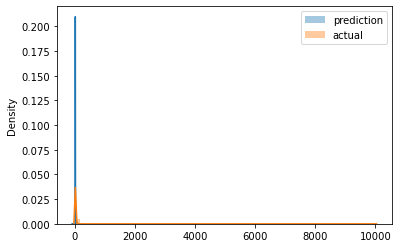

In [19]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [20]:
mean_squared_error(y_train, y_pred, squared=False)

41.99654981000437

In [21]:
feb_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')
feb_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.40,3.50,0.5,0.00,0.0,1.0,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.00,-1.00,-0.5,0.00,0.0,-1.0,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.00,1.00,0.5,0.00,0.0,1.0,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.90,2.25,0.5,0.00,0.0,1.0,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.00,1.00,0.5,3.30,0.0,1.0,25.30,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913950,2,2023-02-28 23:46:00,2023-03-01 00:05:00,NaN,4.65,NaN,None,249,140,0,20.22,0.00,0.5,4.84,0.0,1.0,29.06,NaN,NaN
2913951,2,2023-02-28 23:26:02,2023-02-28 23:37:10,NaN,2.47,NaN,None,186,79,0,13.66,0.00,0.5,2.65,0.0,1.0,20.31,NaN,NaN
2913952,2,2023-02-28 23:24:00,2023-02-28 23:38:00,NaN,3.49,NaN,None,158,143,0,17.64,0.00,0.5,0.00,0.0,1.0,21.64,NaN,NaN
2913953,2,2023-02-28 23:03:00,2023-02-28 23:10:00,NaN,2.13,NaN,None,79,162,0,13.56,0.00,0.5,2.63,0.0,1.0,20.19,NaN,NaN


In [22]:
feb_df['start_time'] = pd.to_datetime(jan_df['tpep_pickup_datetime'])
feb_df['end_time'] = pd.to_datetime(jan_df['tpep_dropoff_datetime'])

feb_df['duration'] = (feb_df['end_time'] - feb_df['start_time']).dt.total_seconds() / 60

In [23]:
feb_dicts = feb_df[categorical + numerical].to_dict(orient='records')
X_feb = dv2.transform(feb_dicts)

y_feb = feb_df[target].values

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_feb)

mean_squared_error(y_feb, y_pred, squared=False)

44.43966720976912